# Core: Exploring and understanding the Data

All imports are sorted and copy from the imports that I use in assignment2.

In [1]:
# importing pandas, and other necessary modules
import io
import sys

import matplotlib.image as mpimg
import matplotlib.pyplot as plt  # visualising
import missingno as msno
import numpy as np  # linear algebra
# import pandas, and other necessary modules
import pandas as pd  # data processing
# easy for structing the report , need pip install pandas-profiling first
import pandas_profiling as pp
import phik
import pydotplus
import seaborn as sns  # visualising
from IPython.display import Image
from numpy import cov
from scipy.stats import pearsonr
from sklearn import datasets, tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (KBinsDiscretizer, LabelEncoder,
                                   OneHotEncoder, OrdinalEncoder,
                                   StandardScaler)
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import glob
import sklearn

import myutil #import my tool script

# Encoding categorical features with preserving the missing values in incomplete features
from sklearn.preprocessing import OrdinalEncoder



# 0. load dataset and merged them into 1 whole dataset.

In [2]:
alternative = pd.read_csv('datasets/alternative.csv')
anime = pd.read_csv("datasets/anime.csv")
blues = pd.read_csv('datasets/blues.csv')
classical = pd.read_csv('datasets/classical.csv')
country = pd.read_csv('datasets/country.csv')
electronics = pd.read_csv('datasets/electronic.csv')
hip_hop = pd.read_csv('datasets/hip-hop.csv')
jazz = pd.read_csv('datasets/jazz.csv')
rap = pd.read_csv('datasets/rap.csv')
rock = pd.read_csv('datasets/rock.csv')
# test_instances = pd.read_csv('datasets/testing-instances.csv')

dataset_list = [
    alternative,
    anime,
    blues,
    classical,
    country,
    electronics,
    hip_hop,
    jazz,
    rap,
    rock
]

# dataset_name_list = ["alternative", "anime", "blues", "classical",
#                      "country", "electronics", "hip_hop", "jazz", "rap", "rock"]
# name_dataset_map = dict(zip(dataset_name_list, dataset_list))

# set the pd to display every rows and cols, so no folding
pd.set_option("display.max_rows", None, "display.max_columns", None)


def merge_multi_datasets(data_list=dataset_list):
    '''merge multiple dataset into one and then return it.
    For example, in data_list, it hold rock,rap ... etc, this method will merge it  using outer
    '''
    merged_all = pd.DataFrame()
    # print(merged_all)
    for dataset in data_list:
        # In order to merge the data without errors, we need to align the index of the "Country/Area" column to keep consistency between data frames. We reset the index value from 0 by sorting the "Country/Area" column in each dataset
        dataset.sort_values(by=['instance_id'], inplace=True)

        # reset index values so dataframes can be merged without errors
        data_to_be_merged = dataset.reset_index(drop=True)

        # 4. finially, merged datasets.
        if merged_all.empty:
            merged_all = data_to_be_merged
        else:
            merged_all = pd.merge(merged_all, data_to_be_merged, how='outer')

    return merged_all
# type(rock)


# check the shapes and if there is any missing values



merged_dataset = merge_multi_datasets()

print(merged_dataset.columns)
print(merged_dataset.shape)


Index(['instance_id', 'artist_name', 'track_hash', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')
(50000, 19)


# 1. Clean the potential dirty data.

such as duplicated, missing, etc.

check whether there are conspicuous NA, which is any missing features among all rows.

In [3]:
print(merged_dataset.info())
myutil.print_NA_details(merged_dataset)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  int64  
 1   artist_name       50000 non-null  object 
 2   track_hash        50000 non-null  object 
 3   track_name        50000 non-null  object 
 4   popularity        50000 non-null  int64  
 5   acousticness      50000 non-null  float64
 6   danceability      50000 non-null  float64
 7   duration_ms       50000 non-null  int64  
 8   energy            50000 non-null  float64
 9   instrumentalness  50000 non-null  float64
 10  key               50000 non-null  object 
 11  liveness          50000 non-null  float64
 12  loudness          50000 non-null  float64
 13  mode              50000 non-null  object 
 14  speechiness       50000 non-null  float64
 15  tempo             50000 non-null  object 
 16  obtained_date     50000 non-null  object

No conspicuous missing. 

Then, check if there are any duplicates based on `track_hash` and `track_name`

In [4]:
# merged_dataset.tail()
duplicateDFRow = merged_dataset[merged_dataset.duplicated(['track_hash','track_name'])]
print(duplicateDFRow)

Empty DataFrame
Columns: [instance_id, artist_name, track_hash, track_name, popularity, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, obtained_date, valence, music_genre]
Index: []


From above, we know that there are no conspicuous missing and duplicates.  

generate the `panda profile report and export it as html`

Not display to widget is because I am using vs code and when quit and reopen again, it will disappear. Therefore, read it via static html is more friendly to myself.

In [5]:
profile_report = pp.ProfileReport(merged_dataset)
# export to html, since look at the static HTML is more friendly to me  
profile_report.to_file('panda-profile-report/before_merged_dataset.html')
merged_dataset.head()


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 25.64it/s]


,instance_id,artist_name,track_hash,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,20012,Avenged Sevenfold,0caajoOsHzQOZtIXitnRUN,Requiem,49,0.000104,0.532,261573,0.953,0.007650,G#,0.119,-5.667,Major,0.0394,142.016,4-Apr,0.485,Alternative
1,20018,BADBADNOTGOOD,0bdabO15YOj0iZPg2OujAw,In Your Eyes (feat. Charlotte Day Wilson),50,0.430000,0.495,247055,0.533,0.000672,C,0.106,-5.802,Minor,0.0295,79.71,4-Apr,0.424,Alternative
2,20042,System Of A Down,0blIe8ZSUusQfh4hvBNWoD,F**k The System,48,0.002160,0.474,132733,0.994,0.126000,G#,0.314,-1.884,Major,0.1030,171.433,4-Apr,0.847,Alternative
3,20057,Jeremy Camp,0CBM2iiBZmfKntDeQYboqU,There Will Be A Day,48,0.109000,0.344,279440,0.667,0.000000,F#,0.103,-5.705,Major,0.0385,77.291,4-Apr,0.208,Alternative
4,20066,Three Days Grace,0c1gHntWjKD7QShC8s99sq,It's All Over,50,0.003050,0.321,249320,0.820,0.000000,C,0.340,-4.459,Minor,0.0422,?,4-Apr,0.198,Alternative


**read csv again since we need to specify which values are missing and/or unusual.** 

It is because there are potential missing values.
For instances, in `tempo`, there are `?`. ANd for 'duration_ms', there are `-1`,which are missing values.

In [6]:
merged_dataset.to_csv("datasets/merged_all.csv", encoding='utf-8', index=False)
merged_dataset = pd.read_csv("datasets/merged_all.csv",na_values=['?','NA','missing','not available','-','-1','empty_field'])
myutil.print_NA_details(merged_dataset)
merged_dataset.head()


missing feature and values:
 artist_name    2489
duration_ms    4939
tempo          4980
dtype: int64


,instance_id,artist_name,track_hash,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,20012,Avenged Sevenfold,0caajoOsHzQOZtIXitnRUN,Requiem,49,0.000104,0.532,261573.0,0.953,0.007650,G#,0.119,-5.667,Major,0.0394,142.016,4-Apr,0.485,Alternative
1,20018,BADBADNOTGOOD,0bdabO15YOj0iZPg2OujAw,In Your Eyes (feat. Charlotte Day Wilson),50,0.430000,0.495,247055.0,0.533,0.000672,C,0.106,-5.802,Minor,0.0295,79.710,4-Apr,0.424,Alternative
2,20042,System Of A Down,0blIe8ZSUusQfh4hvBNWoD,F**k The System,48,0.002160,0.474,132733.0,0.994,0.126000,G#,0.314,-1.884,Major,0.1030,171.433,4-Apr,0.847,Alternative
3,20057,Jeremy Camp,0CBM2iiBZmfKntDeQYboqU,There Will Be A Day,48,0.109000,0.344,279440.0,0.667,0.000000,F#,0.103,-5.705,Major,0.0385,77.291,4-Apr,0.208,Alternative
4,20066,Three Days Grace,0c1gHntWjKD7QShC8s99sq,It's All Over,50,0.003050,0.321,249320.0,0.820,0.000000,C,0.340,-4.459,Minor,0.0422,NaN,4-Apr,0.198,Alternative


## delete instance_id field, since this is 100% unnecessuary feature.
> https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

In [7]:
# the index of instance_id is 0
merged_dataset.drop(merged_dataset.columns[[0]], axis=1, inplace=True)
merged_dataset.tail()  # check if it delete successfully


,artist_name,track_hash,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
49995,The Beatles,7hpFYWL3cw5m4y70cce7Zb,Day Tripper - Remastered 2015,68,0.1200,0.665,169000.0,0.782,0.000004,F#,0.125,-8.438,Minor,0.0307,137.453,4-Apr,0.731,Rock
49996,The Beatles,7JRN5xOUIrnI4crUMOt6X4,I Feel Fine - Remastered 2015,63,0.0904,0.564,139347.0,0.827,0.000004,G,0.127,-7.089,Major,0.0283,89.847,4-Apr,0.912,Rock
49997,Sugarland,507bYMYfbm6sUS9iEAaeSd,Something More,53,0.3130,0.590,216733.0,0.850,0.000000,E,0.116,-4.419,Major,0.0582,102.265,4-Apr,0.415,Rock
49998,Vinyl Theatre,7IQsZqlZ53UIXFjzHOkraF,Breaking Up My Bones,61,0.0125,0.608,185429.0,0.899,0.000000,D,0.211,-3.185,Major,0.0392,105.032,4-Apr,0.652,Rock
49999,MKTO,7K8KNuwZAKKktkfPMosFsM,American Dream,64,0.1140,0.554,225747.0,0.767,0.000000,C,0.231,-5.043,Major,0.0497,122.846,4-Apr,0.497,Rock


## only delete NA for `artist_name` feature since it is MCAR and it is under 5%

This stackoverflow contains everything about different ways of delete NA:
> https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

In [8]:

# TODO: FIXME: It can be upgraded in the future! Maybe in completion or challenge part!
# For this one, it may use feature transformation

print("Shape: Before delete artist_name NA:",merged_dataset.shape)
whole_noArtistName = merged_dataset.dropna(subset = ['artist_name'], inplace=False)
print("Shape: After delete artist_name NA:",whole_noArtistName.shape)


Shape: Before delete artist_name NA: (50000, 18)
Shape: After delete artist_name NA: (47511, 18)


Fill the rest NA by mean value.

TODO: FIXME: It can be upgraded in the future! Maybe in completion or challenge part!

In [9]:
# TODO: FIXME: It can be upgraded in the future! Maybe in completion or challenge part!
whole_noMissing = whole_noArtistName.copy()


print('before:')
print(myutil.print_NA_details(whole_noMissing))
print(whole_noMissing.shape)
print('-'*80)

# whole_noMissing['tempo'].fillna((whole_noMissing['tempo'].mean()), inplace=True)
# whole_noMissing['duration_ms'].fillna((whole_noMissing['duration_ms'].mean()), inplace=True)
whole_noMissing =  myutil.replace_by_mean(whole_noMissing)

print('-'*80)
print('After:')
print(myutil.print_NA_details(whole_noMissing))
print(whole_noMissing.shape)


before:

missing feature and values:
 duration_ms    4696
tempo          4720
dtype: int64
None
(47511, 18)
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
After:

missing feature and values:
 Series([], dtype: int64)
None
(47511, 18)


In [10]:

whole_noMissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47511 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       47511 non-null  object 
 1   track_hash        47511 non-null  object 
 2   track_name        47511 non-null  object 
 3   popularity        47511 non-null  int64  
 4   acousticness      47511 non-null  float64
 5   danceability      47511 non-null  float64
 6   duration_ms       47511 non-null  float64
 7   energy            47511 non-null  float64
 8   instrumentalness  47511 non-null  float64
 9   key               47511 non-null  object 
 10  liveness          47511 non-null  float64
 11  loudness          47511 non-null  float64
 12  mode              47511 non-null  object 
 13  speechiness       47511 non-null  float64
 14  tempo             47511 non-null  float64
 15  obtained_date     47511 non-null  object 
 16  valence           47511 non-null  float6

# Below are From Week7 tutorial. TODO:

By observating the pp report, and output above, i observe that `tempo` should be the numerical feature, but it report that it's categorical feature. This is caused by the value `?` is categorical, and it occur 4980 time, which is less than 10%.

By googling, I think `tempo` a very important feature, from this [tutorial](https://towardsdatascience.com/all-about-missing-data-handling-b94b8b5d2184) and school slide, I find that although it is MCAR, but the missing percentage is greater tahn 5%, which means, just delete it is not an approiate approach, the `imputation` is better approach, so  I decide to try to apply it based on the school tutorial(week7_tut_FCDI.ipynb) using :  
> panda interpolation

In [11]:
# # Now we will split the data to train and test subsets as **ONLY** the training data will be used to learn the imputers then the learnt models are applied to the test data

# X_whole=merged_dataset[merged_dataset.columns[1:-1]]
# y_whole=merged_dataset[merged_dataset.columns[-1]]

# X_whole_train, X_whole_test, y_whole_train, y_whole_test = train_test_split(X_whole, y_whole, test_size=0.3, random_state=42)

Encoding categorical features with preserving the missing values in incomplete features
```python
from sklearn.preprocessing import OrdinalEncoder
```



In [12]:
# encoder = OrdinalEncoder(
#     handle_unknown='use_encoded_value', unknown_value=np.nan)
# X_whole_train_encoded = X_whole_train.copy()


# X_titanic_train_encoded['sex'] = encoder_sex.fit_transform(
#     X_titanic_train_encoded['sex'].values.reshape(-1, 1))

# # Now lets encode the incomplete Cabin feature
# # You can use the same encoder for both but we use two for the sake of clarfication
# encoder_cabin = OrdinalEncoder(
#     handle_unknown='use_encoded_value', unknown_value=np.nan)
# X_titanic_train_encoded['cabin'] = encoder_cabin.fit_transform(
#     X_titanic_train_encoded['cabin'].values.reshape(-1, 1).astype(str))
# # get the code of the "nan" value for the cabin categorical feature
# cabin_nan_code = encoder_cabin.transform([['nan']])[0][0]
# # print(cabin_nan_code)
# # Now, retrive the nan values to be missing in the encoded data
# X_titanic_train_encoded['cabin'].replace(cabin_nan_code, np.nan, inplace=True)

# # X_titanic_train_encoded is the encoded incomplete training data
# #Check the types of the encoded data, no object features
# X_titanic_train_encoded.info()




# X_whole_data_complete=X_whole_train_encoded.copy()
# X_whole_data_complete=X_whole_data_complete.interpolate()
# #The output is 'numpy.ndarray' so we convert it to dataframe for consistency
# X_whole_train_complete=pd.DataFrame(X_whole_train_complete)

# 2. Encoding Categorical data 

Encoding Categorical Variables. This step is for converting categorical data to numerical data. We have 2 categorical variables which are country and regional Indicator, so after this step, they will be translate to numerical data in order forpreparing to the machine learning. I use LabelEncoder() method from tutorial to encode them into the numerical valuesand replace it to the dataset

> https://zhuanlan.zhihu.com/p/117230627
>
> https://stackoverflow.com/questions/57507832/unable-to-allocate-array-with-shape-and-data-type


In [13]:
categorical = {'artist_name', 'track_hash','track_name','key','obtained_date','mode','music_genre'}

whole_encode_all = whole_noMissing.copy()

# 1st, use label encoder to encode mode and the class label: music_genre
# mode has only 2 values, so I think it can use labelEncoder as well
whole_encode_all  = myutil.label_encoder(whole_encode_all,feature_list=['mode','music_genre'])

# whole_encode_all = myutil.encode_class_label(whole_encode_all)
# whole_encode_all = myutil.encode_feature_mode(whole_encode_all)

# 2nd, use ordinal encoder to handle the rest
whole_encode_all = myutil.ordinal_encoder(dataset=whole_encode_all,feature_list=['key','obtained_date'])

whole_encode_all = myutil.ordinal_encoder(dataset=whole_encode_all,feature_list=['artist_name', 'track_hash','track_name'])



whole_encode_all.info()
whole_encode_all.head()


# FIXME: SHIT, it report the MemoryError: Unable to allocate 14.1 GiB for an array with shape (47511, 39917) and data type float64
# my labtop only has 8 GB RAM, F**K https://stackoverflow.com/questions/57507832/unable-to-allocate-array-with-shape-and-data-type
# # 2nd, use ordinal encoder to encode 'key','obtained_date' these 2 features
# whole_encode_all = myutil.ordinal_encoder(whole_encode_all)

# # 3rd, use one hot encoder to encode 'artist_name','track_hash','track_name'
# # whole_encode_all = myutil.one_hot_encoder(whole_encode_all)
# feature_list = ['artist_name','track_hash','track_name']
# whole_encode_all = myutil.one_hot_encoder(whole_encode_all,feature_list=feature_list)

# whole_encode_all.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 47511 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       47511 non-null  float64
 1   track_hash        47511 non-null  float64
 2   track_name        47511 non-null  float64
 3   popularity        47511 non-null  int64  
 4   acousticness      47511 non-null  float64
 5   danceability      47511 non-null  float64
 6   duration_ms       47511 non-null  float64
 7   energy            47511 non-null  float64
 8   instrumentalness  47511 non-null  float64
 9   key               47511 non-null  float64
 10  liveness          47511 non-null  float64
 11  loudness          47511 non-null  float64
 12  mode              47511 non-null  int32  
 13  speechiness       47511 non-null  float64
 14  tempo             47511 non-null  float64
 15  obtained_date     47511 non-null  float64
 16  valence           47511 non-null  float6

,artist_name,track_hash,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,460.0,5618.0,26336.0,49,0.000104,0.532,261573.0,0.953,0.007650,11.0,0.119,-5.667,0,0.0394,142.016000,3.0,0.485,0
1,488.0,5431.0,16020.0,50,0.430000,0.495,247055.0,0.533,0.000672,3.0,0.106,-5.802,1,0.0295,79.710000,3.0,0.424,0
2,5573.0,5455.0,10033.0,48,0.002160,0.474,132733.0,0.994,0.126000,11.0,0.314,-1.884,0,0.1030,171.433000,3.0,0.847,0
3,2808.0,2233.0,33731.0,48,0.109000,0.344,279440.0,0.667,0.000000,9.0,0.103,-5.705,0,0.0385,77.291000,3.0,0.208,0
4,6135.0,5508.0,16438.0,50,0.003050,0.321,249320.0,0.820,0.000000,3.0,0.340,-4.459,1,0.0422,119.960525,3.0,0.198,0


# 3. Normalisation. 

This step is to transform columns to a consistent set of rules, which means need to meet the convention.Due to the scales of each feature  is different and not unified, and some machine learning methods are greatly affectedby it, so this step is fundamental and essential. I normalize all the feature columns except for the ladder score to theconsistent set of scales

In [14]:
scaler = StandardScaler()

# iterate each col and do the normalization
for (columnName, columnData) in whole_encode_all.iteritems():
    # music_genre is Class Label Y, so need to use KBinsDiscretizer
    if columnName == "music_genre":
        continue
    
    # if  columnName == 'artist_name' or columnName =='track_hash' or columnName =='track_name':
    #     continue
    # # country and region are categorical feature that the ML should not focus on, so do not apply Normalisation on it 
    # if columnName == 'Country_Class' or columnName == "Regional_Class":
    #     continue

    whole_encode_all[columnName] = scaler.fit_transform(columnData.values.reshape(-1,1))


# 4. Discretisation.

 ~~Since the happiness ladder score is the target and it is discreate numerical, so in order to do the machinelearning, this attribute need to be converted to the nominal attribute. I apply the discretisation to transform it into 4different happiness ladder levels, so that the machine is able to learn~~

In [15]:
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# print(est.fit_transform(df.Temperature.values.reshape(-1, 1)))

whole_encode_all["music_genre"] = est.fit_transform(
    whole_encode_all["music_genre"].values.reshape(-1, 1))

# whole_encode_all.rename(columns={'music_genre': 'class'}, inplace=True)


# profile_report = pp.ProfileReport(whole_encode_all)
# # export to html, since look at the static HTML is more friendly to me  
# profile_report.to_file('panda-profile-report/encode_all.html')



In [16]:
whole_encode_all.head()


,artist_name,track_hash,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,-1.489739,-1.258420,0.570248,0.307928,-0.896807,-0.147781,0.153231,1.336036,-0.535072,1.632191,-0.463560,0.562044,-0.747331,-0.535257,7.578378e-01,0.233448,0.116122,0.0
1,-1.475657,-1.274109,-0.331432,0.372272,0.363890,-0.354884,0.015491,-0.253857,-0.556511,-0.681049,-0.544008,0.540102,1.338094,-0.633170,-1.383029e+00,0.233448,-0.130716,0.0
2,1.081735,-1.272096,-0.854732,0.243584,-0.890777,-0.472428,-1.069141,1.491240,-0.171445,1.632191,0.743160,1.176918,-0.747331,0.093759,1.768622e+00,0.233448,1.580964,0.0
3,-0.308863,-1.542429,1.216615,0.243584,-0.577463,-1.200085,0.322744,0.253394,-0.558576,1.053881,-0.562573,0.555868,-0.747331,-0.544158,-1.466148e+00,0.233448,-1.004765,0.0
4,1.364381,-1.267649,-0.294896,0.372272,-0.888167,-1.328824,0.036980,0.832570,-0.558576,-0.681049,0.904056,0.758388,1.338094,-0.507565,-7.812680e-15,0.233448,-1.045231,0.0


In [17]:
whole_encode_all.columns

Index(['artist_name', 'track_hash', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date',
       'valence', 'music_genre'],
      dtype='object')

For dimension reduction.
> delete cols:

> +  https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

interval columns not set, guessing: ['track_hash', 'track_name', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre']


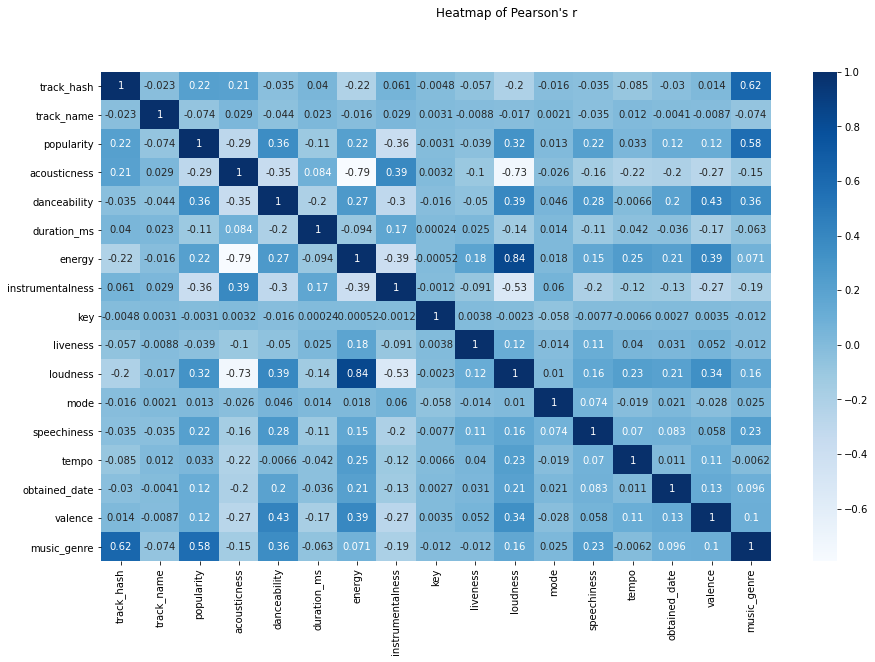

In [37]:
X = whole_encode_all[whole_encode_all.columns[1:-1]]
Y = whole_encode_all[whole_encode_all.columns[-1]]
# data = (X,Y)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

# concat the train sets
train_df = pd.concat([X_train, y_train], axis=1)
# the heatmap of Pearson's r

pearson = train_df.corr()
phik = train_df.phik_matrix()
def plot_heatmap(cor, name):
    """plot_heatmap by the cor parameter
    Args:
        cor ([type]): corelation value that you want to use to plot
    """
    fig = plt.figure(figsize=(15, 9))
    sns.heatmap(cor,  cmap='Blues', annot=True)
    fig.suptitle("Heatmap of "+ name)

# myutil.plot_heatmap(pearson, "Pearson's r")
plot_heatmap(pearson, "Pearson's r")


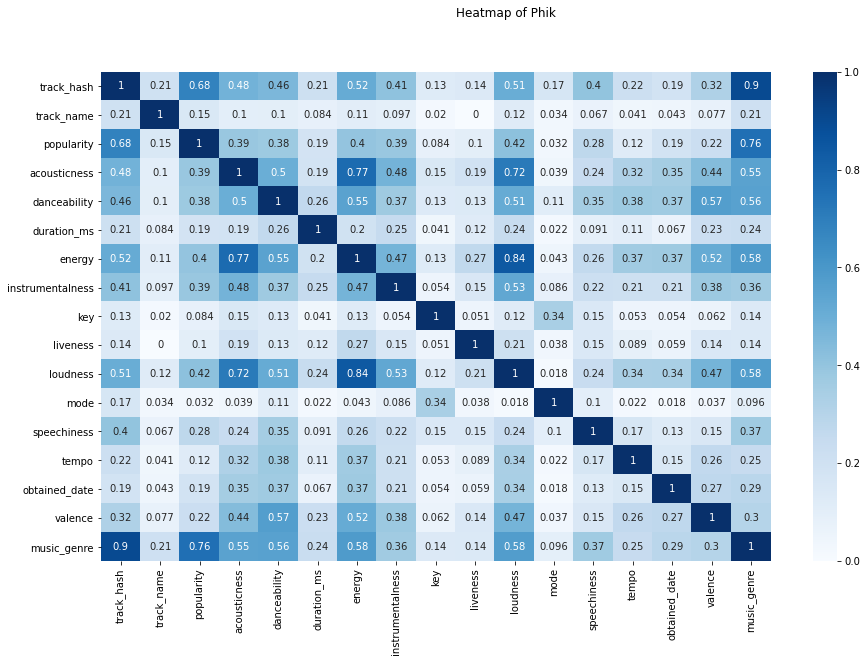

In [38]:
# myutil.plot_heatmap(phik, "Phik")
plot_heatmap(phik, "Phik")

In [39]:
# sns.boxplot(x='Ladder Score', y='Regional indicator',data=whole_encode_all).set_title('2017 Regional vs happiness score')

In [77]:
def find_feature_name(cor, method_name, corr_val=0.45, class_label='music_genre'):
    """
    find matched feature name with class_label where the the corr() should be bigger than corr_val 
    return a list of column strings, does not count music_genre itself 
    """
    print('-'*80)
    print(method_name)
    cor_target = cor[class_label]
    relevant_features = cor_target[(cor_target > 0.5)]
    print(relevant_features)
    print('-'*80)
    features_list = []
    for col in train_df.columns:
        if col == class_label:
            continue
        c1 = -999
        if method_name == 'pearson':
            c1, _ = pearsonr(train_df[class_label], train_df[col])
        else:
            c1 = phik[class_label][col]
        if(c1 >= corr_val):
            features_list.append(col)
    return features_list


def find_feature_name_between_2_vars(cor_method_name, var1,  corr_val=0.5):
    """
    For feature interaction purpose(Core Q1). Find matched features between var1O(i.e. feature) and all other features

    return a list of column strings, does not count var1 itself 
    """
    features_list = []
    for col in train_df.columns:
        if col == var1:  # do not count itself, since it is always 1
            continue
        c1 = -999
        if cor_method_name == 'pearson':
            c1, _ = pearsonr(train_df[var1], train_df[col])
        else:
            c1 = phik[var1][col]
        if(c1 >= corr_val):
            features_list.append(col)

    return features_list


phik_feature_list = find_feature_name(phik, 'phik')
pearson_feature_list = find_feature_name(pearson, 'pearson')
# print(phik_feature_list)
# print(pearson_feature_list)

# use set to make sure no duplicates, and then back to list
matched_features = list(set(phik_feature_list+pearson_feature_list))
print('-'*80 + '\nFinal mathced features:'+'\nsize:', len(matched_features))
matched_features


--------------------------------------------------------------------------------
phik
track_hash      0.901025
popularity      0.755680
acousticness    0.552941
danceability    0.557749
energy          0.584818
loudness        0.576621
music_genre     1.000000
Name: music_genre, dtype: float64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
pearson
track_hash     0.620959
popularity     0.576288
music_genre    1.000000
Name: music_genre, dtype: float64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Final mathced features:
size: 6


['popularity',
 'danceability',
 'track_hash',
 'loudness',
 'acousticness',
 'energy']

For features interactions:


In [78]:
# find_feature_name_between_2_vars(cor_method_name=phik,var1=matched_features[0])

# Finish Cleaning,Start to train and test.

# Random Forest

1. Use only features that are candidates(i.e. in matched_feature list).




In [79]:
# print(matched_features)
matched_features_copy = matched_features.copy()
matched_features_copy.remove('track_hash')
X_train = X_train[matched_features_copy]
X_test = X_test[matched_features_copy]

classif = RandomForestClassifier(max_depth=12)  
classif.fit(X_train, y_train)  # fit it

classif_score = classif.score(X_test,y_test)
# reg_score = dTree_reg.score(X_test,y_test)
print('-'*80,"\nThe performance on provided dataset: \nfinially, we can see:\n for random forest classifier, the mean accuracy is: \n\t\t\t\t\t",classif_score)


-------------------------------------------------------------------------------- 
The performance on provided dataset: 
finially, we can see:
 for random forest classifier, the mean accuracy is: 
					 0.5552650041456726


For test-instance dataset

In [85]:
print(matched_features_copy)
test_instances = pd.read_csv('datasets/testing-instances.csv')
test_instances =  test_instances[matched_features_copy]
test_instances.shape
# classif.predict(test_instances)




['popularity', 'danceability', 'loudness', 'acousticness', 'energy']


(20000, 5)